Prélude: Installation et importation des librairies

In [40]:
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install optuna
!pip install xgboost
!pip install catboost
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.6/538.6 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 MB 30.7 MB/s eta 0:00:00


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import optuna
import shap
from PIL import Image
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from catboost import CatBoostRegressor

ModuleNotFoundError: ModuleNotFoundError: No module named 'matplotlib'


# Phase 0

Dans cette phase initiale, nous allons détailler et définir clairement notre use case. Cette étape est essentielle pour assurer que toutes les parties prenantes aient une compréhension commune des objectifs du projet, des contraintes, et des résultats attendus. 

**En quoi consiste la Phase 0**

1. **Définir les Objectifs du Projet** :
   - **Qu'est-ce que nous essayons de réaliser ?** : Définir clairement le problème que nous cherchons à résoudre. Dans le cas présent, il s'agit de prédire les prix des propriétés immobilières.
   
2. **Identifier les Parties Prenantes et leurs Exigences** :
   - **Qui est impliqué et que veulent-ils ?** : Identifier les utilisateurs finaux, les décideurs et toute autre personne impactée par le projet. Recueillir leurs besoins et attentes spécifiques.

3. **Définir les Critères de Succès** :
   - **Comment saurons-nous si nous avons réussi ?** : Établir des métriques et des critères clairs pour évaluer le succès du projet.

4. **Élaborer un Plan de Projet Initial** :
   - **Quel est notre plan d'action ?** : Créer un plan de projet détaillant les étapes à suivre, les ressources nécessaires, les échéanciers, et les responsabilités. 

## Use case : Plateforme d'estimation immobilière éthique 

**Notre vision**

Notre startup développe une plateforme éthique et transparente pour l'estimation immobilière à Ames, Iowa. Nous offrons des évaluations précises des biens immobiliers en fonction des conditions actuelles du marché. Les vendeurs peuvent ajouter leurs données gratuitement, améliorant ainsi la qualité de notre dataset, tandis que les acheteurs souscrivent pour consulter ces informations, incluant le prix de vente réel et notre estimation du juste prix. 

**Notre objectif**

L'objectif de notre plateforme est de fournir un outil pratique et fiable pour les acheteurs et les vendeurs, afin de déterminer le juste prix des propriétés à Ames. En évitant les estimations trop élevées ou trop basses, nous favorisons la transparence sur le marché immobilier local. Pour assurer la précision de nos évaluations, la plateforme ne fournit pas d'estimations pour certains biens spécifiques comme les mobile homes ou les manoirs de célébrités, en raison de leur caractère peu commun et des difficultés liées à leur estimation. 

**Caractéristiques principales**

- Estimations précises : Utilisation d'un modèle prédictif avancé intégrant jusqu’à 79 des variables que les vendeurs peuvent introduire pour décrire leur bien. 

- Transparence et éthique : Les vendeurs sont incités à fournir le vrai prix de vente lorsqu'ils retirent une annonce, contribuant ainsi à la précision des données et aux estimations objectives. 

- Feedback utilisateur : Les utilisateurs peuvent signaler des erreurs dans les estimations, ainsi que des valeurs exorbitantes ou bizarres, permettant une amélioration continue de l'algorithme. 

**Monétisation** 

- Abonnements : L’accès à la plateforme est payant pour les acheteurs. 

- Pénalités pour non-disclosure : Les vendeurs qui refusent de divulguer les raisons du retrait de leur annonce ou le vrai prix de vente sont soumis à une taxe. 

**Mise en œuvre**

- Développement technique : Construction et amélioration du modèle prédictif avec une intégration des retours d’utilisateurs pour corriger les biais. 

- Collecte de données : Incitation pour les vendeurs à entrer les données précises, en soulignant l'importance de la qualité des données pour une évaluation fiable. 

- Lancement et marketing : Campagne de sensibilisation sur l'importance des données précises et des estimations équitables. 

**Impact attendu** 

La plateforme vise à transformer le marché immobilier à Ames en renforçant la transparence et l'équité, aidant ainsi les acheteurs à prendre des décisions éclairées et permettant aux vendeurs de contribuer à des estimations justes de leurs propriétés sans frais. Les données doivent être de bonne qualité impérativement, notamment les vrais prix de vente, car sans cela, notre algorithme ne peut pas être bien entraîné.  

**Métriques d'évaluation**

- Métrique mathématique : Le Root Mean Squared Log Error (RMSLE) est choisi pour son approche des erreurs relatives plutôt qu’absolues, idéal dans l’estimation immobilière où les valeurs varient largement. Cette métrique réduit l'impact des erreurs importantes pour des propriétés à haute valeur, garantissant ainsi des évaluations équitables et favorisant la transparence de notre plateforme. 

- Métrique métier : Suivi de la précision des prédictions par rapport aux prix de vente finaux, notamment lorsque les vendeurs retirent leurs annonces. Nous demandons la raison du retrait et le vrai prix de vente, avec une taxe imposée si ces informations ne sont pas fournies. 

- Métrique du succès financier : La réussite financière du projet sera évaluée en fonction du taux d'adoption par les utilisateurs et de leur satisfaction, indépendamment des valeurs des propriétés estimées. 

**Étapes du projet**

1. Business understanding : Compréhension des besoins du marché immobilier à Ames et définition des objectifs de la plateforme. 

2. Data understanding : Exploration des données disponibles, identification des variables clés et compréhension de leur influence sur les prix des propriétés. 

3. Data engineering : Préparation et nettoyage des données, gestion des valeurs manquantes et création de nouvelles variables pertinentes (feature engineering). 

4. Modélisation (tuning) : Développement et optimisation des modèles prédictifs, incluant les techniques avancées comme le random forest et le gradient boosting. 

5. Évaluation : Évaluation des performances des modèles à l'aide de la métrique RMSLE, analyse des biais et des erreurs, et validation croisée. 

6. Déploiement : Mise en production du modèle sélectionné, intégration dans la plateforme et mise en place d'un système de monitoring pour assurer la performance continue et l'amélioration basée sur les retours d'utilisateurs.


## ML canvas

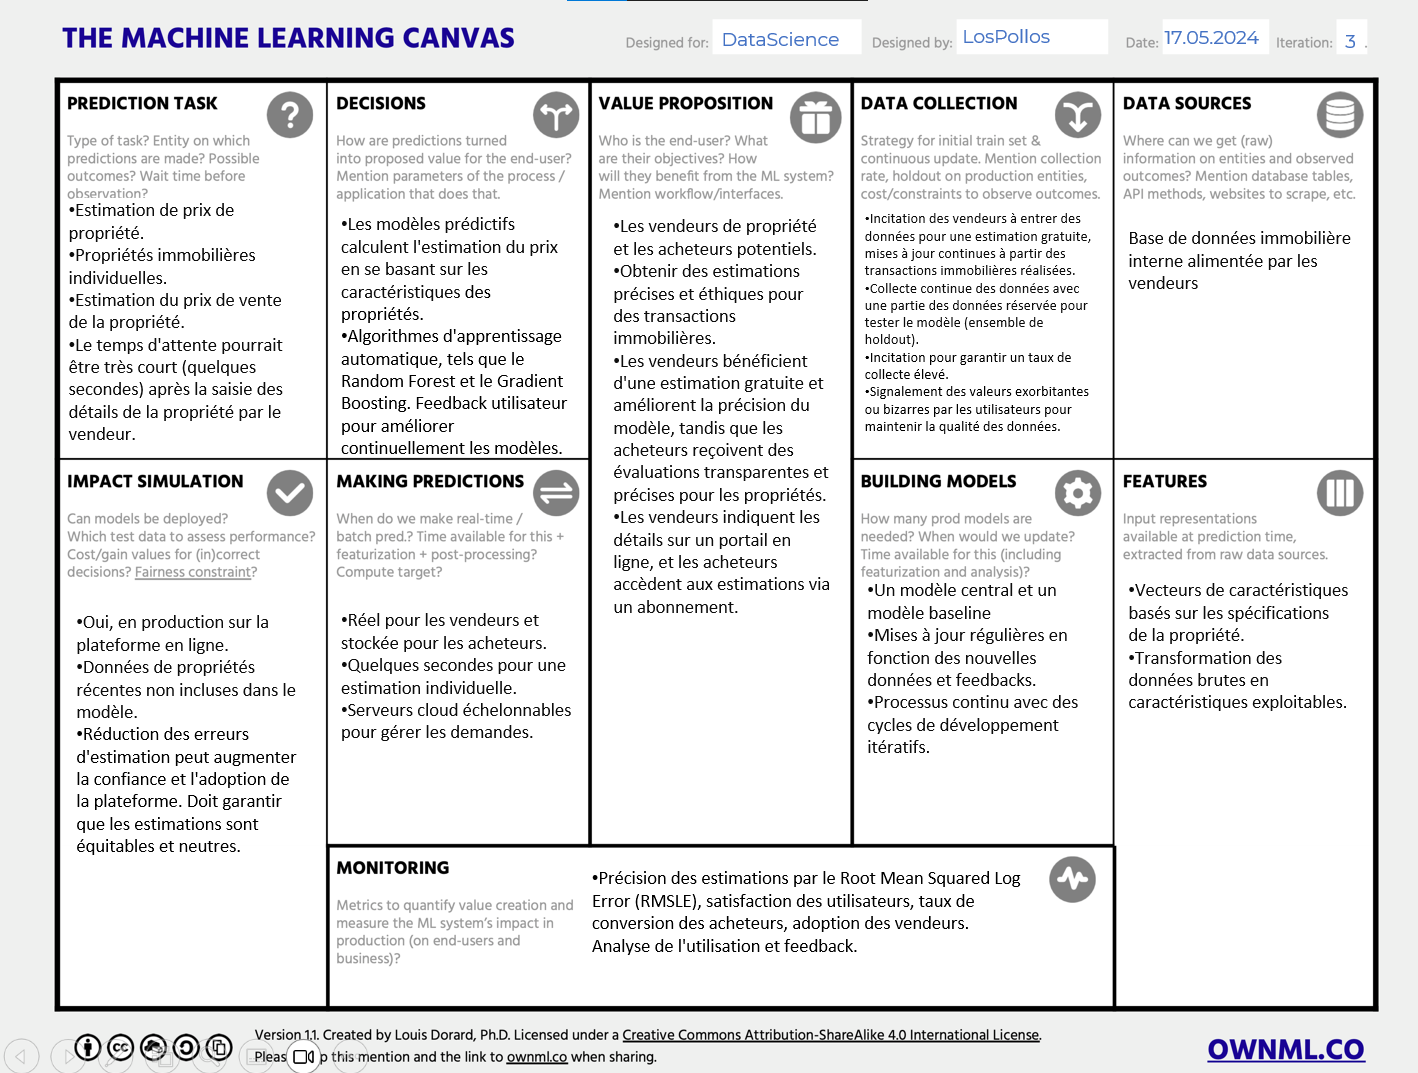

In [39]:
image = Image.open('/data/workspace_files/Canva.png')
display(image)

# Phase d'Idéation

La phase d'idéation est une étape cruciale dans le développement d'un projet de machine learning. Elle consiste à explorer, analyser et comprendre les données disponibles, à formuler des hypothèses sur ces données, et à concevoir un modèle de base qui servira de référence pour les améliorations futures. Voici les étapes clés de cette phase et pourquoi elles sont importantes :

**Pourquoi la phase d'idéation est importante ?**

- **Compréhension des données :** Avant de créer un modèle performant, il est essentiel de bien comprendre les données sur lesquelles ce modèle sera basé. Cela inclut la structure des données, les valeurs manquantes, les distributions des variables, et les relations potentielles entre elles.
- **Validation des hypothèses :** Formuler et tester des hypothèses permet de vérifier des croyances intuitives ou des théories sur les données. Cela peut révéler des insights importants et des patterns cachés.
- **Construction d'un modèle de référence :** Un modèle baseline simple permet de mesurer les performances initiales et de servir de point de comparaison pour évaluer les améliorations apportées par des modèles plus sophistiqués.

## Data mining & Data analysis

**Qu'est-ce que c'est ?**

- **Data mining:** Extraire des informations et des motifs cachés à partir de données brutes.
- **Data analysis:** Processus d'inspection, de nettoyage, de transformation et de modélisation des données dont le but est de découvrir des informations utiles, de tirer des conclusions et de soutenir la prise de décision.

Dans cette étape, nous allons charger nos données et examiner leurs caractéristiques principales. L'objectif est de comprendre la structure et la qualité des données afin de préparer une base solide pour les étapes suivantes.

Nous allons ensuite émettre quelques hypotèses et utiliser des graphiques pour visualiser les relations entre les variables. Ceci va nous aider mieux apréhender les données pour notre modèle baseline.

### Analyse des données disponibles
Fichiers disponibles : 
- `train.csv` - Les données d'entraînement
- `test.csv` - Les données de test
- `data_description.txt` - Descriptions des données et signification des valeurs
- `sample_submission.csv` - Soumission de référence

Après analyse du fichier `data_description.txt`, nous remarquons que les données comportent un bon nombre de colonnes catégorielles. Il faudra veiller à traiter correctement les colonnes qui désignent des catégories de logement mais avec des nombres.

### Exploration des données
Pour commencer, nous chargeons le jeu des données d'entraînement à partir du fichier `train.csv` dans un DataFrame. La colonne `Id` fera office d'index afin de faciliter l'identification des enrengistrements.

Nous effectuons ensuite plusieurs manipulations nécessaires au sein du DataFrame pour la compréhension des données.
- Étape 1 : Afficher les premières lignes pour un aperçu de la structure des données et vérifier le chargement.
- Étape 2 : Afficher les informations basiques du DataFrame pour avoir une idée du nombre de colonnes et de leurs types.
- Étape 3 : Compter les valeurs null pour établir le traitement adéquat.


Pour nous donner une idée de la représentation des biens, nous terminerons par un graphique de la distribution des prix de vente.

In [5]:
# Chargement des données
train_path = 'data/train.csv'
train_data = pd.read_csv(train_path , index_col="Id")

test_path = 'data/test.csv'
test_data = pd.read_csv(test_path , index_col="Id")

In [7]:
# Étape 1 : Afficher les première lignes du DataFrame
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
# Étape 2 : Afficher les informations basiques du DataFrame
train_data.info()
train_data.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

(1460, 80)

In [9]:
# Étape 3 : Compter les valeurs null
missing_values_train = train_data.isnull().sum().sort_values(ascending=False)

print(missing_values_train[missing_values_train > 0])

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


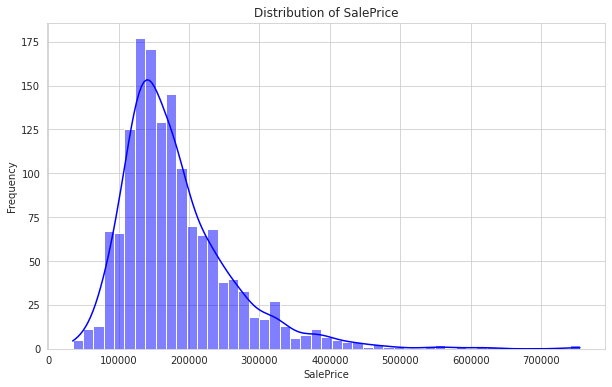

In [16]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot the distribution of SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], kde=True, color='blue')
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

### Émission d'hypothèses sur les données

Dans cette section, nous allons émettre et tester plusieurs hypothèses concernant les données pour mieux comprendre les facteurs influençant les prix des propriétés. 

**Pourquoi émettre des hypothèses ?**

Cela permet de structurer notre exploration des données en se basant sur des connaissances préalables et des intuitions logiques. Les hypothèses nous aident à :

- **Diriger l'analyse :** En ayant des hypothèses, nous pouvons orienter notre analyse vers des aspects spécifiques des données, ce qui permet de gagner du temps et d'être plus efficace.
- **Valider des théories :** Les hypothèses nous permettent de tester des théories et des idées sur les données. Cela peut aider à confirmer ou infirmer des croyances courantes ou des résultats de recherches antérieures.
- **Détecter des relations :** En formulant des hypothèses, nous pouvons identifier et examiner des relations potentielles entre les variables, ce qui peut révéler des patterns importants.
- **Améliorer les modèles :** Les hypothèses peuvent guider la sélection des variables et des caractéristiques à inclure dans les modèles de machine learning, améliorant ainsi leur performance et leur interprétabilité.

#### Hypothèse 1 : La surface habitable totale a une forte corrélation avec le prix de vente.

Il est raisonnable de penser que les maisons avec une plus grande surface habitable seront vendues plus chères car elles offrent plus d'espace de vie.

Nous allons vérifier cette hypothèse en traçant un scatter plot entre la superficie habitable et le prix des propriétés.

Correlation between GrLivArea and SalePrice: 0.71


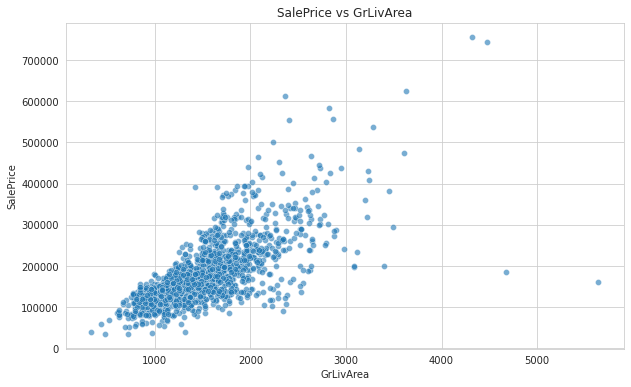

In [17]:
# Scatter plot for GrLivArea vs SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_data['GrLivArea'], y=train_data['SalePrice'], alpha=0.6)
plt.title('SalePrice vs GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

# Calcul de la corrélation
correlation_grlivarea_saleprice = train_data['GrLivArea'].corr(train_data['SalePrice'])
print(f"Correlation between GrLivArea and SalePrice: {correlation_grlivarea_saleprice:.2f}")

#### Hypothèse 2 : Les maisons situées dans certains quartiers se vendent à des prix significativement plus élevés.

La localisation est un facteur clé dans l'immobilier. Certains quartiers, en raison de leur proximité avec des commodités, leur sécurité ou leur prestige, peuvent voir leurs prix augmenter significativement.

Nous allons vérifier cette hypothèse en utilisant des box plots pour comparer les prix de vente entre différents quartiers.

                       mean            std        25%       50%        75%
Neighborhood                                                              
Blmngtn       194870.882353   30393.229219  174000.00  191000.0  213490.00
Blueste       137500.000000   19091.883092  130750.00  137500.0  144250.00
BrDale        104493.750000   14330.176493   91000.00  106000.0  118000.00
BrkSide       124834.051724   40348.689270  100500.00  124300.0  141175.00
ClearCr       212565.428571   50231.538993  183750.00  200250.0  242225.00
CollgCr       197965.773333   51403.666438  152958.75  197200.0  225725.00
Crawfor       210624.725490   68866.395472  159250.00  200624.0  239000.00
Edwards       128219.700000   43208.616459  101500.00  121750.0  145225.00
Gilbert       192854.506329   35986.779085  174000.00  181000.0  197200.00
IDOTRR        100123.783784   33376.710117   81000.00  103000.0  120500.00
MeadowV        98576.470588   23491.049610   83500.00   88000.0  115000.00
Mitchel       156270.1224

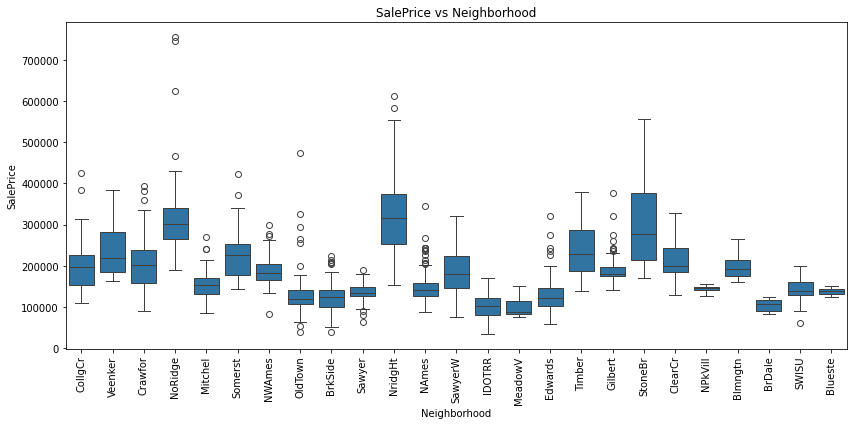

In [11]:
# Boxplot for SalePrice vs Neighborhood
plt.figure(figsize=(14, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=train_data)
plt.title('SalePrice vs Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')
plt.xticks(rotation=90)
plt.show()

# Statistiques descriptives par quartier
neighborhood_stats = train_data.groupby('Neighborhood')['SalePrice'].describe()
print(neighborhood_stats[['mean', 'std', '25%', '50%', '75%']])

#### Hypothèse 3 : L'année de construction influence positivement le prix de vente.

Les maisons plus récentes pourraient être plus chères en raison de matériaux de construction modernes, d'une meilleure isolation, et de conceptions plus actuelles.

Nous allons vérifier cette hypothèse en traçant un scatter plot entre l'année de construction et le prix de vente.

Correlation between YearBuilt and SalePrice: 0.52


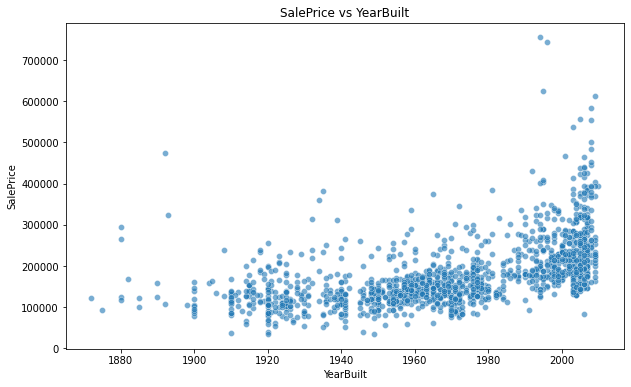

In [12]:
# Scatter plot for YearBuilt vs SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_data['YearBuilt'], y=train_data['SalePrice'], alpha=0.6)
plt.title('SalePrice vs YearBuilt')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.show()

# Calcul de la corrélation
correlation_yearbuilt_saleprice = train_data['YearBuilt'].corr(train_data['SalePrice'])
print(f"Correlation between YearBuilt and SalePrice: {correlation_yearbuilt_saleprice:.2f}")

#### Hypothèse 4 : La présence d'un garage augmente significativement le prix de vente.

Un garage est souvent considéré comme un atout précieux pour une propriété, offrant un espace de stationnement sécurisé et un espace de stockage supplémentaire.

Nous allons vérifier cette hypothèse en utilisant des box plots pour comparer les prix de vente des maisons avec et sans garage.

Correlation between GarageArea and SalePrice: 0.62


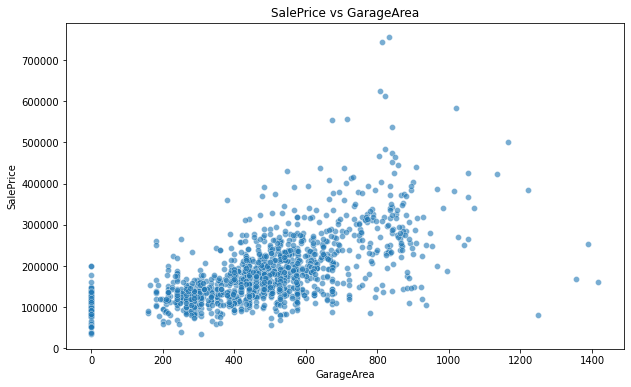

In [13]:
# Scatter plot for GarageArea vs SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_data['GarageArea'], y=train_data['SalePrice'], alpha=0.6)
plt.title('SalePrice vs GarageArea')
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.show()

# Calcul de la corrélation
correlation_garagearea_saleprice = train_data['GarageArea'].corr(train_data['SalePrice'])
print(f"Correlation between GarageArea and SalePrice: {correlation_garagearea_saleprice:.2f}")

#### Hypothèse 5 : La taille du sous-sol est fortement corrélée au prix de vente.

Dans la région d'Ames, Iowa, qui est sujette aux tornades, les sous-sols peuvent être considérés comme des espaces précieux. Ainsi, il est raisonnable de penser que les propriétés avec des sous-sols plus grands pourraient se vendre à des prix plus élevés.

Nous allons vérifier cette hypothèse en traçant un scatter plot entre la taille du sous-sol et le prix des propriétés.

Correlation between TotalBsmtSF and SalePrice: 0.61


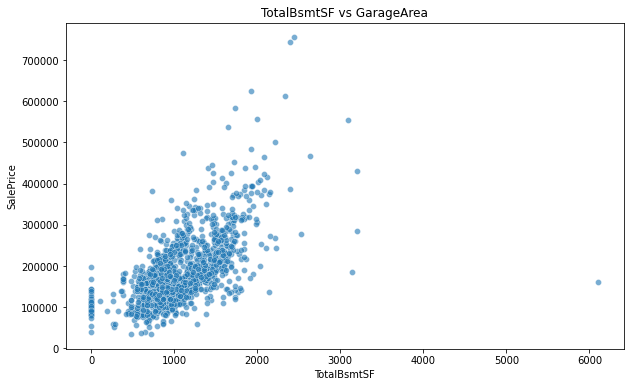

In [15]:
# Scatter plot for TotalBsmtSF vs SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_data['TotalBsmtSF'], y=train_data['SalePrice'], alpha=0.6)
plt.title('TotalBsmtSF vs GarageArea')
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.show()

# Calcul de la corrélation
correlation_garagearea_saleprice = train_data['TotalBsmtSF'].corr(train_data['SalePrice'])
print(f"Correlation between TotalBsmtSF and SalePrice: {correlation_garagearea_saleprice:.2f}")

## Modèle baseline
**Pourquoi créer un modèle baseline ?**

Le modèle baseline nous servira de point de référence pour comparer les performances de modèles plus complexes. Nous obtiendrons ainsi de précieuses informations sur l'efficacité des modèles.

**Construire un modèle baseline efficace**

- Étape 1 : Traiter et nettoyer les données en nous occupant des valeurs manquantes, des valeurs aberrantes et de l'encodage des variables catégorielles.
- Étape 2 : Sélectionner les caractéristiques étant les plus corrélées à l'objectif (ici le prix).
- Étape 3 : Établir des mesures de performances qui serviront de référence pour mesurer le progrès des mocèles plus complexes.

**Choix pour notre modèle baseline**

- Régression linéaire : Choisi pour sa simplicité.
- Validation croisée : Nous évaluerons notre modèle uniquement sur les données d'entrainement en les divisant en 5 parties.
- Root Mean Squared Logarithmic Error (RMSLE) : Métrique courante pour les problèmes de régression, utilisée pour punir proportionnellement les erreurs.

### Étape 1 : Traiter et nettoyer les données

Dans cette étape, nous allons effectuer des traitements simples pour nettoyer et préparer nos données pour l'analyse et la modélisation. L'objectif est de rendre les données cohérentes et exploitables en traitant les valeurs manquantes de manière pragmatique.

Pour cette étape nous : 
- Créons des groupes pour les colonnes catégoriques et numériques.
- Traitons les valeurs null des colonnes catégoriques en les remplaçant par `NA`.
- Traitons les valeurs null des colonnes numériques en les remplaçant par `0`.

In [21]:
baseline_data = train_data

# Identification des colonnes catégoriques et numériques
baseline_categorical_cols = baseline_data.select_dtypes(include=['object']).columns
baseline_numerical_cols = baseline_data.drop(columns=['SalePrice']).select_dtypes(exclude=['object']).columns

# Définition des imputers pour les données catégoriques et numériques
baseline_categorical_imputer = SimpleImputer(strategy='constant', fill_value='NA')
baseline_numerical_imputer = SimpleImputer(strategy='constant', fill_value=0)

# Application des imputers sur les données d'entraînement
baseline_data[baseline_categorical_cols] = baseline_categorical_imputer.fit_transform(baseline_data[baseline_categorical_cols])
baseline_data[baseline_numerical_cols] = baseline_numerical_imputer.fit_transform(baseline_data[baseline_numerical_cols])

# Vérification qu'il ne reste plus de valeurs manquantes
print("\nMissing Values after imputation in baseline data:", baseline_data.isnull().sum().sum())


Missing Values after imputation in baseline data: 0


### Étape 2 : Sélection des features

Pour cette étape, nous allons identifier les caractéristiques les plus pertinentes pour notre modèle de prédiction des prix. Nous allons le faire en analysant la corrélation entre chaque caractéristique et la variable cible `SalePrice`.

La matrice de corrélation nous aide à comprendre quelles variables ont une relation forte avec notre variable cible. Une corrélation élevée avec SalePrice signifie que la variable peut être un bon prédicteur du prix.

Pour cette étape, nous aurons besoins de : 
- Calculer les matrice de corrélation.
- Extraire les corrélations relatives à la variable `SalePrice`.
- Visualiser les coefficient de corrélation.
- Sélectionner les features au coefficient supérieur à 0.6.

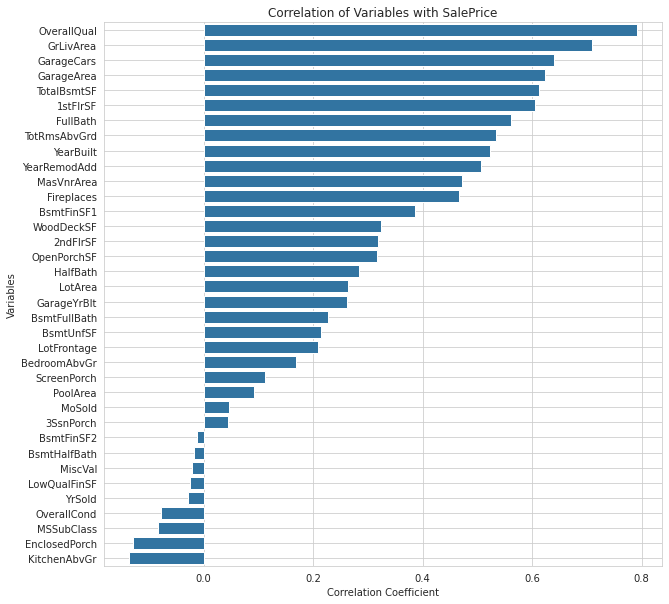

OverallQual 0.790982
GrLivArea 0.708624
GarageCars 0.640409
GarageArea 0.623431
TotalBsmtSF 0.613581
1stFlrSF 0.605852
FullBath 0.560664
TotRmsAbvGrd 0.533723
YearBuilt 0.522897
YearRemodAdd 0.507101
MasVnrArea 0.472614
Fireplaces 0.466929
BsmtFinSF1 0.386420
WoodDeckSF 0.324413
2ndFlrSF 0.319334
OpenPorchSF 0.315856
HalfBath 0.284108
LotArea 0.263843
GarageYrBlt 0.261366
BsmtFullBath 0.227122
BsmtUnfSF 0.214479
LotFrontage 0.209624
BedroomAbvGr 0.168213
ScreenPorch 0.111447
PoolArea 0.092404
MoSold 0.046432
3SsnPorch 0.044584
BsmtFinSF2 -0.011378
BsmtHalfBath -0.016844
MiscVal -0.021190
LowQualFinSF -0.025606
YrSold -0.028923
OverallCond -0.077856
MSSubClass -0.084284
EnclosedPorch -0.128578
KitchenAbvGr -0.135907
Name: SalePrice, dtype: float64

In [32]:
# Calcul de la matrice de corrélation des colonnes numériques
correlation_matrix = baseline_data.corr(numeric_only=True)

# Extraction des corrélations relatives à 'SalePrice'
sale_price_correlations = correlation_matrix['SalePrice'].sort_values(ascending=False)

# Exclure SalePrice de la série sale_price_correlations
sale_price_correlations = sale_price_correlations.drop('SalePrice')

# Visualisation des corrélations avec SalePrice
plt.figure(figsize=(10, 10))
sns.barplot(x=sale_price_correlations.values, y=sale_price_correlations.index)
plt.title('Correlation of Variables with SalePrice')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')
plt.grid(True)
plt.show()

sale_price_correlations

In [34]:

# Sélectionner les fonctionnalités ayant un coefficient de corrélation supérieur à 0.6
selected_features = sale_price_correlations[sale_price_correlations > 0.6].index.tolist()

# Afficher les fonctionnalités sélectionnées
print("Features with correlation coefficient > 0.6:\n", selected_features)

Features with correlation coefficient > 0.6:
 ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']


### Étape 3 : Établir le modèle et les mesures de performances

Dans cette étape, nous allons établir notre modèle de prédiction, effectuer une validation croisée pour évaluer ses performances, et calculer les scores moyens. Nous commencerons par un modèle de régression linéaire simple comme baseline pour évaluer les performances de base.

- **Normalisation de la distribution :** Comme nous l'avons vu dans le graphique de distribution, `SalePrice` est fortement asymétrique vers la droite. Une transformation logarithmique permet de normaliser la distribution, la rendant plus symétrique et proche d'une loi normale. Cela peut améliorer les performances des modèles linéaires qui supposent que les erreurs sont normalement distribuées.
- **Réduction de l'impact des valeurs extrêmes :** La transformation logarithmique réduit l'effet des valeurs extrêmes, rendant le modèle plus robuste.
- **Évaluation Robuste :** La validation croisée permet d'évaluer les performances du modèle sur plusieurs sous-ensembles des données, fournissant une estimation plus robuste et plus fiable de la performance du modèle.
- **Réduction du Surapprentissage :** En utilisant plusieurs sous-ensembles pour entraîner et tester le modèle, nous réduisons le risque de surapprentissage (overfitting), où le modèle pourrait bien fonctionner sur les données d'entraînement mais mal sur les nouvelles données.

Pour cette étape nous devons :
- Transformer `SalePrice` en valeur logarithmique.
- Définir le type de modèle à utiliser.
- Faire de la validation croisée.
- Calculer la moyenne des scores.

In [35]:
# Sélection des features
baseline_x = baseline_data[selected_features]

# Transformation logarithmique de la variable cible
baseline_y = np.log1p(baseline_data['SalePrice'])

# Définition du modèle de régression linéaire
model = LinearRegression()

# Validation croisée du modèle
cv_scores = cross_val_score(model, baseline_x, baseline_y, scoring="neg_mean_squared_error", cv=5)

# Conversion de l'erreur quadratique moyenne négative en RMSLE (Root Mean Squared Log Error)
rmsle_cv_scores = np.sqrt(-cv_scores)

# Affichage des scores de validation croisée
print("Scores de validation croisée: ", rmsle_cv_scores)

# Affichage du score moyen
print("Score moyen de validation croisée: ", np.mean(rmsle_cv_scores))

Scores de validation croisée:  [0.16962468 0.19377508 0.17751216 0.16583773 0.21805914]
Score moyen de validation croisée:  0.18496175823100386


# Phase de Design

La phase de design est une étape essentielle dans le développement d'un projet de machine learning. Elle consiste à préparer la pipeline de données, à tester différents modèles et à optimiser les performances du système. Voici les étapes clés de cette phase et pourquoi elles sont importantes :

**Pourquoi la phase de design est importante ?**

- **Préparation de la Pipeline de Données** : Une pipeline de données bien conçue assure que les données sont nettoyées, transformées et prêtes pour être utilisées par les modèles. Cela permet de standardiser et d'automatiser le processus de préparation des données.
  
- **Tests de Différents Modèles** : Essayer différents modèles permet de trouver l'algorithme qui offre les meilleures performances pour notre use case spécifique. Cela inclut l'optimisation des hyperparamètres et la validation des modèles.

**Ce que nous allons faire dans cette phase :**

1. **Data Engineering : Préparation de la Pipeline**
    - **Création de la pipeline de transformation des données** : Nous allons établir une série d'étapes pour transformer les données brutes en un format adapté aux modèles de machine learning. Cela inclut des transformations spécifiques pour les variables catégoriques et numériques.
    - **Traitement des valeurs manquantes** : Les valeurs manquantes dans les données peuvent biaiser les résultats des modèles. Nous allons donc imputer ces valeurs avec des stratégies appropriées, comme la moyenne pour les variables numériques et une valeur constante pour les variables catégoriques.
    - **Encodage des variables catégoriques** : Les modèles de machine learning ne peuvent pas traiter directement les données catégoriques. Nous allons donc convertir ces variables en un format numérique, souvent en utilisant des techniques comme l'encodage one-hot.
    - **Standardisation ou normalisation des variables numériques** : Les variables numériques peuvent avoir des échelles différentes, ce qui peut affecter les performances des modèles. Nous allons standardiser ou normaliser ces variables pour les rendre comparables.

2. **Model Engineering : Tests de Différents Modèles**
    - **Sélection de modèles divers** : Nous allons tester plusieurs types de modèles, notamment la Ridge Regression, la Lasso Regression, la Decision Tree Regression, le Gradient Boosting avec XGBoost et le Gradient Boosting avec CatBoost. Chaque modèle a ses propres forces et faiblesses, et il est important de déterminer lequel est le mieux adapté à nos données.
    - **Validation croisée** : Pour évaluer de manière fiable les performances des modèles, nous allons utiliser des techniques de validation croisée. Cela implique de diviser les données en plusieurs sous-ensembles et d'entraîner/tester le modèle plusieurs fois pour obtenir une estimation robuste de ses performances.
    - **Optimisation des hyperparamètres** : Chaque modèle a des paramètres spécifiques qui peuvent être ajustés pour améliorer ses performances. Nous allons utiliser la librairie Optuna pour trouver les meilleures combinaisons de ces paramètres.
    - **Évaluation des performances** : Nous allons comparer les performances des modèles en utilisant des métriques appropriées, notamment la racine carrée de l'erreur quadratique logarithmique moyenne (RMSLE) pour les tâches de régression. Le modèle avec les meilleures performances globales sera sélectionné pour la phase suivante.

## Data Engineering

L'objectif de cette section est de préparer une pipeline Scikit-learn afin de traiter les données des datasets `train` et `test`. La pipeline doit être capable de `fit()` sur le dataset `train.csv` et `transform()` sur le dataset `test.csv`.

**Pourquoi une pipeline de données est-elle nécessaire ?**

- **Automatisation** : La pipeline permet d'automatiser le processus de préparation des données, ce qui réduit les erreurs manuelles et augmente l'efficacité.
- **Reproductibilité** : Une pipeline garantit que les mêmes transformations sont appliquées de manière cohérente aux données d'entraînement et de test, assurant ainsi la reproductibilité des résultats.
- **Gestion des transformations complexes** : Elle permet de gérer facilement des transformations complexes et de les enchaîner de manière logique.

**Étapes de la préparation de la pipeline :**

1. **Identification des Types de Données** :
   - **Colonnes numériques**
   - **Colonnes catégoriques** : Dissocier les colonne catégoriques ordinales et nominales.

2. **Traitement des Valeurs Manquantes** :
   - **Colonnes numériques** : Remplacer les valeurs manquantes par `0`.
   - **Colonnes catégoriques** : Remplacer les valeurs manquantes par une valeur constante `NA` indiquant l'absence d'information.

3. **Encodage des Variables Catégoriques** :
   - Utiliser l'encodage One-Hot pour convertir les variables catégoriques nominales en variables numériques.
   - Utiliser l'encodage Ordinal pour les variables catégoriques ordinales.

4. **Standardisation ou Normalisation des Données** :
   - **Colonnes numériques** : Standardiser les valeurs pour qu'elles aient une moyenne de 0 et un écart-type de 1, afin de rendre les variables comparables entre elles.

### Préparation de la pipeline


In [46]:
# Identifier les colonnes catégoriques et numériques
categorical_cols = train_data.select_dtypes(include=['object']).columns
numerical_cols = train_data.drop(columns=['SalePrice']).select_dtypes(exclude=['object']).columns

# Définir les colonnes numériques, ordinales et nominales
numerical_cols = [col for col in numerical_cols if col not in ['MSSubClass', 'OverallQual', 'OverallCond']]
ordinal_cols = [
    'LotShape', 'LandContour', 'LandSlope', 'Utilities', 'OverallQual', 'OverallCond', 
    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
    'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 
    'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence'
]
nominal_cols = [col for col in categorical_cols if col not in ordinal_cols]
nominal_cols.append('MSSubClass')

# Définir les catégories spécifiques pour les colonnes ordinales
ordinal_categories = [
    ['Reg', 'IR1', 'IR2', 'IR3'],  # LotShape
    ['Lvl', 'Bnk', 'HLS', 'Low'],  # LandContour
    ['Gtl', 'Mod', 'Sev'],  # LandSlope
    ['ELO', 'NoSeWa', 'NoSewr', 'AllPub'],  # Utilities
    list(range(1, 11)),  # OverallQual
    list(range(1, 11)),  # OverallCond
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # ExterQual
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # ExterCond
    ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # BsmtQual
    ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # BsmtCond
    ['NA', 'No', 'Mn', 'Av', 'Gd'],  # BsmtExposure
    ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # BsmtFinType1
    ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # BsmtFinType2
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # HeatingQC
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # KitchenQual
    ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],  # Functional
    ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # FireplaceQu
    ['NA', 'Unf', 'RFn', 'Fin'],  # GarageFinish
    ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # GarageQual
    ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # GarageCond
    ['N', 'P', 'Y'],  # PavedDrive
    ['NA', 'Fa', 'TA', 'Gd', 'Ex'],  # PoolQC
    ['NA', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']  # Fence
]

# Imputer spécifique pour les colonnes catégoriques et numériques
categorical_imputer = SimpleImputer(strategy='constant', fill_value='NA')
numerical_imputer = SimpleImputer(strategy='constant', fill_value=0)

# Définir les étapes de transformation pour les colonnes nominales
nominal_transformer = Pipeline(steps=[
    ('imputer', categorical_imputer),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Définir les étapes de transformation pour les colonnes ordinales avec les catégories spécifiques
ordinal_transformer = Pipeline(steps=[
    ('imputer', categorical_imputer),
    ('ordinal', OrdinalEncoder(categories=ordinal_categories, handle_unknown='use_encoded_value', unknown_value=-1))
])

# Définir les étapes de transformation pour les colonnes numériques
numerical_transformer = Pipeline(steps=[
    ('imputer', numerical_imputer),
    ('scaler', StandardScaler())
])

# Combinaison des transformateurs en utilisant ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('nom', nominal_transformer, nominal_cols),
        ('ord', ordinal_transformer, ordinal_cols)
    ])

# Création de la pipeline de prétraitement complète
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Application de la pipeline sur les données d'entraînement
pipeline.fit(train_data.drop(columns=['SalePrice']))

# Fonction pour obtenir les noms des features après transformation
def get_feature_names(preprocessor, numerical_cols, nominal_cols, ordinal_cols):
    """

    :rtype: object
    """
    # Noms des features numériques
    num_features = numerical_cols
    
    # Noms des features nominales après OneHotEncoding
    nominal_features = list(preprocessor.transformers_[1][1]['onehot'].get_feature_names_out(nominal_cols))
    
    # Noms des features ordinales
    ord_features = ordinal_cols
    
    # Combiner tous les noms de features
    all_features = num_features + nominal_features + ord_features
    
    return all_features

# Obtenir les noms des features après transformation
feature_names = get_feature_names(preprocessor, numerical_cols, nominal_cols, ordinal_cols)

# Transformation des données d'entraînement et de test
train_x = pipeline.transform(train_data.drop(columns=['SalePrice']))
train_y = np.log1p(train_data['SalePrice'])
test_x = pipeline.transform(test_data)

## Model Engineering

Dans cette section, nous allons explorer cinq modèles de régression différents pour prédire les prix des propriétés immobilières. Pour chaque modèle, nous utiliserons la bibliothèque Optuna pour l'optimisation des hyperparamètres et nous appliquerons le modèle à notre pipeline de traitement des données. Ensuite, nous utiliserons SHAP pour la visualisation et l'interprétation des résultats de chaque modèle. Les modèles choisis sont :

1. **Ridge Regression**
2. **Lasso Regression**
3. **Decision Tree Regressor**
4. **Gradient Boosting avec XGBoost**
5. **Gradient Boosting avec CatBoost**

**Interprétation avec SHAP :** 

SHAP (SHapley Additive exPlanations) nous permettra d'interpréter les contributions de chaque feature aux prédictions des modèles. Cela nous aidera à comprendre quelles variables influencent le plus le prix des propriétés.

### Ridge Regression
La Ridge Regression est une variante de la régression linéaire qui ajoute une pénalité de norme L2 aux coefficients de régression. Cette pénalité aide à réduire le surapprentissage (overfitting) en réduisant la complexité du modèle, ce qui peut améliorer les performances sur des ensembles de données de grande dimension.

**Pourquoi c'est intéressant**

- Réduction de l'overfitting : La pénalité L2 aide à réduire le surapprentissage en contraignant les coefficients du modèle.
- Stabilité : Elle rend le modèle plus stable en présence de multicolinéarité.
- Simplicité et Interprétabilité : Malgré l'ajout de la pénalité, le modèle reste simple et interprétable, similaire à la régression linéaire.

**Optimisation des hyperparamètres avec Optuna**

Dans le cas de la Ridge Regression, nous allons optimiser l'hyperparamètre `alpha`, qui contrôle la force de la pénalisation.

In [47]:
def objective_ridge(trial):
    alpha = trial.suggest_float('alpha', 1e-3, 100.0, log=True)
    ridge = Ridge(alpha=alpha)
    score = cross_val_score(ridge, train_x, train_y, cv=5, scoring='neg_mean_squared_log_error')
    return -score.mean()

# Créer une étude Optuna pour minimiser la fonction objectif
study_ridge = optuna.create_study(direction='minimize')
study_ridge.optimize(objective_ridge, n_trials=100)

# Afficher les meilleurs hyperparamètres trouvés
print(f"Best alpha: {study_ridge.best_params['alpha']}")

# Définir le meilleur modèle Ridge avec les hyperparamètres optimisés
best_ridge = Ridge(alpha=study_ridge.best_params['alpha'])

# Entraîner le modèle sur les données d'entraînement préparées
best_ridge.fit(train_x, train_y)

# Utiliser le modèle entraîné pour faire des prédictions
predictions_log = best_ridge.predict(train_x)

# Convertir les prédictions logarithmiques en échelle normale
predictions = np.expm1(predictions_log)

# Calculer le RMSLE sur les prédictions
rmsle = np.sqrt(mean_squared_log_error(train_data['SalePrice'], predictions))
print(f"RMSLE: {rmsle}")

Best alpha: 10.459955273518206
RMSLE: 0.11302913158300354


[I 2024-06-13 13:03:41,248] A new study created in memory with name: no-name-6bd5a1d6-35ca-4cb0-a439-35515710c8be
[I 2024-06-13 13:03:41,306] Trial 0 finished with value: 0.00011385673763411688 and parameters: {'alpha': 2.526002974550589}. Best is trial 0 with value: 0.00011385673763411688.
[I 2024-06-13 13:03:41,402] Trial 1 finished with value: 0.0001172402528188007 and parameters: {'alpha': 1.0283694116675637}. Best is trial 0 with value: 0.00011385673763411688.
[I 2024-06-13 13:03:41,478] Trial 2 finished with value: 0.00012055896922901978 and parameters: {'alpha': 0.562191988353239}. Best is trial 0 with value: 0.00011385673763411688.
[I 2024-06-13 13:03:41,541] Trial 3 finished with value: 0.0001382326887507677 and parameters: {'alpha': 0.002720992285310456}. Best is trial 0 with value: 0.00011385673763411688.
[I 2024-06-13 13:03:41,601] Trial 4 finished with value: 0.0001157957291596212 and parameters: {'alpha': 95.95492110218535}. Best is trial 0 with value: 0.00011385673763411

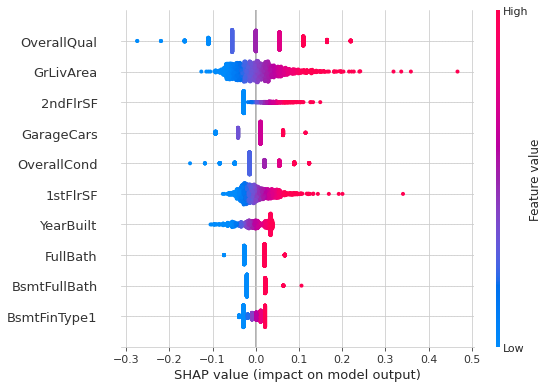

In [58]:
# SHAP values
explainer = shap.Explainer(best_ridge, train_x)
shap_values = explainer(train_x)

# Visualisation
shap.summary_plot(shap_values, train_x, feature_names, max_display=10)

### Lasso Regression
La Lasso Regression (Least Absolute Shrinkage and Selection Operator) est une variante de la régression linéaire qui ajoute une pénalité de norme L1 aux coefficients de régression. Cette pénalité peut conduire à des coefficients de régression exactement nuls, ce qui permet de sélectionner les variables les plus importantes.

**Pourquoi c'est intéressant**

- Sélection des Variables : La pénalité L1 permet d'effectuer une sélection automatique des variables en contraignant certains coefficients à être exactement égaux à zéro.
- Réduction de l'overfitting : La pénalité L1 aide à réduire le surapprentissage en contraignant les coefficients du modèle.
- Simplicité et Interprétabilité : Comme la Ridge Regression, le modèle reste simple et interprétable, mais avec l'avantage supplémentaire de la sélection de caractéristiques.

**Optimisation des hyperparamètres avec Optuna**

Dans le cas de la Lasso Regression, nous allons optimiser l'hyperparamètre `alpha`, qui contrôle la force de la pénalisation.

In [13]:
# Définition de la fonction objectif pour Optuna
def objective_lasso(trial):
    alpha = trial.suggest_float('alpha', 1e-3, 100.0, log=True)
    lasso = Lasso(alpha=alpha)
    score = cross_val_score(lasso, train_x, train_y, cv=5, scoring='neg_mean_squared_log_error')
    return -score.mean()

# Créer une étude Optuna pour minimiser la fonction objectif
study_lasso = optuna.create_study(direction='minimize')
study_lasso.optimize(objective_lasso, n_trials=100)

# Afficher les meilleurs hyperparamètres trouvés
print(f"Best alpha: {study_lasso.best_params['alpha']}")

# Définir le meilleur modèle Lasso avec les hyperparamètres optimisés
best_lasso = Lasso(alpha=study_lasso.best_params['alpha'])

# Entraîner le modèle sur les données d'entraînement préparées
best_lasso.fit(train_x, train_y)

# Utiliser le modèle entraîné pour faire des prédictions
predictions_log = best_lasso.predict(train_x)

# Convertir les prédictions logarithmiques en échelle normale
predictions = np.expm1(predictions_log)

# Calculer le RMSLE sur les prédictions
rmsle = np.sqrt(mean_squared_log_error(train_data['SalePrice'], predictions))
print(f"RMSLE: {rmsle}")

Best alpha: 0.0010014838057400513
RMSLE: 0.12012533273941366


[I 2024-06-12 18:34:07,488] A new study created in memory with name: no-name-d78c99de-68ff-4873-94e5-76efb946f0cd
[I 2024-06-12 18:34:07,553] Trial 0 finished with value: 0.0009406924517435635 and parameters: {'alpha': 3.925983169102251}. Best is trial 0 with value: 0.0009406924517435635.
[I 2024-06-12 18:34:07,593] Trial 1 finished with value: 0.0002717974157715197 and parameters: {'alpha': 0.09993401616833084}. Best is trial 1 with value: 0.0002717974157715197.
[I 2024-06-12 18:34:07,620] Trial 2 finished with value: 0.0009406924517435635 and parameters: {'alpha': 83.76379434707694}. Best is trial 1 with value: 0.0002717974157715197.
[I 2024-06-12 18:34:07,655] Trial 3 finished with value: 0.0009406924517435635 and parameters: {'alpha': 0.6675463766165958}. Best is trial 1 with value: 0.0002717974157715197.
[I 2024-06-12 18:34:07,694] Trial 4 finished with value: 0.00016653502878042893 and parameters: {'alpha': 0.028823196746422856}. Best is trial 4 with value: 0.00016653502878042893

### Decision Tree Regressor

Le Decision Tree Regressor est un modèle non linéaire qui partitionne l'espace des caractéristiques en régions homogènes en fonction de la variable cible. Chaque nœud interne de l'arbre représente une décision basée sur une seule caractéristique, et chaque feuille représente une valeur de prédiction.

**Pourquoi c'est intéressant**

- Simplicité et Interprétabilité : Les arbres de décision sont faciles à interpréter et à visualiser.
- Capture des Relations Non Linéaires : Les arbres de décision peuvent capturer des interactions complexes entre les caractéristiques sans nécessiter de transformation explicite des données.
- Pas de Prérequis pour la Normalisation : Les arbres de décision ne nécessitent pas que les caractéristiques soient normalisées ou standardisées.

**Optimisation des hyperparamètres avec Optuna**

Dans le cas du Decision Tree Regressor, nous allons optimiser les hyperparamètres :

- Profondeur maximale : `max_depth`
- Nombre minimum d'échantillons pour la division : `min_samples_split`
- Nombre minimum d'échantillons pour les feuilles : `min_samples_leaf`

L'optimisation des hyperparamètres pour des modèles comme les arbres de décision nécessite un grand nombre d'essais. Cela est dû à la complexité du modèle, à la sensibilité aux variations dans les données et à l'espace de recherche large des hyperparamètres.

In [14]:
# Fonction objectif pour Optuna
def objective_dtree(trial):
    max_depth = trial.suggest_int('max_depth', 1, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    
    dcr = DecisionTreeRegressor(max_depth=max_depth, 
                                  min_samples_split=min_samples_split,
                                  min_samples_leaf=min_samples_leaf)
    
    
    score = cross_val_score(dcr, train_x, y, cv=5, scoring='neg_mean_squared_log_error')
    return -score.mean()

# Créer une étude Optuna pour minimiser la fonction objectif
study_dtree = optuna.create_study(direction='minimize')
study_dtree.optimize(objective_dtree, n_trials=250)

# Afficher les meilleurs hyperparamètres trouvés
print(f"Best max_depth: {study_dtree.best_params['max_depth']}")
print(f"Best min_samples_split: {study_dtree.best_params['min_samples_split']}")
print(f"Best min_samples_leaf: {study_dtree.best_params['min_samples_leaf']}")

# Définir le meilleur modèle Decision Tree avec les hyperparamètres optimisés
best_dtree = DecisionTreeRegressor(max_depth=study_dtree.best_params['max_depth'], 
                                   min_samples_split=study_dtree.best_params['min_samples_split'],
                                   min_samples_leaf=study_dtree.best_params['min_samples_leaf'])

# Entraîner le modèle sur les données d'entraînement préparées
best_dtree.fit(train_x, train_y)

# Utiliser le modèle entraîné pour faire des prédictions
predictions_log = best_dtree.predict(train_x)

# Convertir les prédictions logarithmiques en échelle normale
predictions = np.expm1(predictions_log)

# Calculer le RMSLE sur les prédictions
rmsle = np.sqrt(mean_squared_log_error(np.expm1(train_y), predictions))
print(f"RMSLE: {rmsle}")

Best max_depth: 9
Best min_samples_split: 14
Best min_samples_leaf: 9
RMSLE: 0.12646622078814598


[I 2024-06-12 18:34:16,177] A new study created in memory with name: no-name-3260c69f-3050-448f-8602-436569ccfb71
[I 2024-06-12 18:34:16,362] Trial 0 finished with value: 0.00021271802811798722 and parameters: {'max_depth': 18, 'min_samples_split': 19, 'min_samples_leaf': 19}. Best is trial 0 with value: 0.00021271802811798722.
[I 2024-06-12 18:34:16,479] Trial 1 finished with value: 0.00020394613197846954 and parameters: {'max_depth': 8, 'min_samples_split': 20, 'min_samples_leaf': 10}. Best is trial 1 with value: 0.00020394613197846954.
[I 2024-06-12 18:34:16,571] Trial 2 finished with value: 0.00023936718369434233 and parameters: {'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.00020394613197846954.
[I 2024-06-12 18:34:16,718] Trial 3 finished with value: 0.00020964391885029246 and parameters: {'max_depth': 20, 'min_samples_split': 14, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.00020394613197846954.
[I 2024-06-12 18:34:16,835]

### Gradient Boosting avec XGBoost

XGBoost (Extreme Gradient Boosting) est une implémentation optimisée de l'algorithme de boosting par gradient. Il est conçu pour être très efficace, flexible et portable. XGBoost utilise des arbres de décision comme apprenants faibles et les combine de manière additive pour corriger les erreurs des prédictions précédentes.

**Pourquoi c'est intéressant**

- Performance : XGBoost est l'un des algorithmes de machine learning les plus performants, souvent utilisé dans les compétitions Kaggle en raison de sa capacité à produire des modèles de haute précision.
- Efficacité : XGBoost est conçu pour être rapide et efficace grâce à l'optimisation des calculs et à la prise en charge du parallélisme.
- Flexibilité : Il offre de nombreuses options pour la régularisation, le contrôle de la complexité des modèles, et la gestion des données manquantes.
- Robustesse : XGBoost intègre des mécanismes de régularisation qui aident à éviter le surapprentissage (overfitting).

**Optimisation des hyperparamètres avec Optuna**

Pour XGBoost, nous allons optimiser plusieurs hyperparamètres clés, notamment `n_estimators`, `max_depth`, `learning_rate`, `subsample`, et `colsample_bytree`.

In [26]:
# Fonction objectif pour Optuna
def objective_xgboost(trial):
    param = {
        'verbosity': 0,
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
    }
    
    gradient_boosting_xgb = xgb.XGBRegressor(**param)
    score = cross_val_score(gradient_boosting_xgb, train_x, train_y, cv=5, scoring='neg_mean_squared_log_error')
    return -score.mean()

# Créer une étude Optuna pour minimiser la fonction objectif
study_xgboost = optuna.create_study(direction='minimize')
study_xgboost.optimize(objective_xgboost, n_trials=50)

# Afficher les meilleurs hyperparamètres trouvés
print(f"Best params: {study_xgboost.best_params}")

# Définir le meilleur modèle XGBoost avec les hyperparamètres optimisés
best_xgboost = xgb.XGBRegressor(**study_xgboost.best_params, verbosity=0)

# Diviser les données pour avoir un ensemble de validation
train_x_train, train_x_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

# Entraîner le modèle sur les données d'entraînement préparées
best_xgboost.fit(train_x_train, y_train, eval_set=[(train_x_valid, y_valid)], early_stopping_rounds=10, verbose=0)

# Utiliser le modèle entraîné pour faire des prédictions sur l'ensemble de validation
predictions_log = best_xgboost.predict(train_x_valid)

# Convertir les prédictions logarithmiques en échelle normale
predictions = np.expm1(predictions_log)
y_valid_normal = np.expm1(y_valid)

# Calculer le RMSLE sur les prédictions
rmsle = np.sqrt(mean_squared_log_error(y_valid_normal, predictions))
print(f"RMSLE: {rmsle}")

Best params: {'n_estimators': 603, 'max_depth': 3, 'learning_rate': 0.029064691540763722, 'subsample': 0.6590036610629054, 'colsample_bytree': 0.897569736415561, 'min_child_weight': 5}
RMSLE: 0.13290361557628952


[I 2024-06-12 18:56:04,726] A new study created in memory with name: no-name-4559b440-a7e8-44d0-894a-85ebdf9fc9d6
[I 2024-06-12 18:56:09,245] Trial 0 finished with value: 0.00010638086755503792 and parameters: {'n_estimators': 342, 'max_depth': 10, 'learning_rate': 0.13184599125043506, 'subsample': 0.6902168507490121, 'colsample_bytree': 0.7129313514161586, 'min_child_weight': 5}. Best is trial 0 with value: 0.00010638086755503792.
[I 2024-06-12 18:56:11,972] Trial 1 finished with value: 9.361391523736627e-05 and parameters: {'n_estimators': 798, 'max_depth': 3, 'learning_rate': 0.015693656220760764, 'subsample': 0.9919653638662842, 'colsample_bytree': 0.507361810619356, 'min_child_weight': 7}. Best is trial 1 with value: 9.361391523736627e-05.
[I 2024-06-12 18:56:17,294] Trial 2 finished with value: 9.119442463022816e-05 and parameters: {'n_estimators': 698, 'max_depth': 6, 'learning_rate': 0.03436687812139409, 'subsample': 0.7254288621449991, 'colsample_bytree': 0.6199895551576069, '

### Gradient Boosting avec CatBoost
CatBoost (Categorical Boosting) est un algorithme de boosting par gradient développé par Yandex. Il est spécialement conçu pour gérer les variables catégorielles de manière efficace sans nécessiter de transformation préliminaire comme le one-hot encoding. CatBoost offre également des temps de formation rapides et de bonnes performances sur des données hétérogènes.

**Pourquoi c'est intéressant**

- Gestion des Variables Catégorielles : CatBoost est particulièrement efficace pour les données contenant de nombreuses variables catégorielles. Il n'exige pas de transformation préalable, ce qui simplifie le prétraitement.
- Performances : CatBoost est connu pour ses bonnes performances et son efficacité en termes de temps d'entraînement.
- Robustesse : Il inclut des techniques pour réduire le surapprentissage, comme les permutations aléatoires et d'autres techniques de régularisation.

**Optimisation des hyperparamètres avec Optuna**

Pour CatBoost, nous allons optimiser plusieurs hyperparamètres clés, notamment `iterations`, `depth`, `learning_rate`, `l2_leaf_reg`, et `border_count`.

In [27]:
# Fonction objectif pour Optuna
def objective_catboost(trial):
    param = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10.0),
        'border_count': trial.suggest_int('border_count', 32, 255)
    }
    
    gradient_boosting_catboost = CatBoostRegressor(**param, verbose=0)
    score = cross_val_score(gradient_boosting_catboost, train_x, train_y, cv=5, scoring='neg_mean_squared_log_error')
    return -score.mean()

# Créer une étude Optuna pour minimiser la fonction objectif
study_catboost = optuna.create_study(direction='minimize')
study_catboost.optimize(objective_catboost, n_trials=50)

# Afficher les meilleurs hyperparamètres trouvés
print(f"Best params: {study_catboost.best_params}")

# Définir le meilleur modèle CatBoost avec les hyperparamètres optimisés
best_catboost = CatBoostRegressor(**study_catboost.best_params, verbose=0)

# Diviser les données pour avoir un ensemble de validation
train_x_train, train_x_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

# Entraîner le modèle sur les données d'entraînement préparées
best_catboost.fit(train_x_train, y_train, eval_set=(train_x_valid, y_valid), early_stopping_rounds=10, verbose=0)

# Utiliser le modèle entraîné pour faire des prédictions sur l'ensemble de validation
predictions_log = best_catboost.predict(train_x_valid)

# Convertir les prédictions logarithmiques en échelle normale
predictions = np.expm1(predictions_log)
y_valid_normal = np.expm1(y_valid)

# Calculer le RMSLE sur les prédictions
rmsle = np.sqrt(mean_squared_log_error(y_valid_normal, predictions))
print(f"RMSLE: {rmsle}")

Best params: {'iterations': 519, 'depth': 6, 'learning_rate': 0.05562450547436304, 'l2_leaf_reg': 1.2886775410316345, 'border_count': 239}
RMSLE: 0.1310185893730483


[I 2024-06-12 18:59:32,983] A new study created in memory with name: no-name-01d39a6a-9573-433a-9394-de777aebc2c9
[I 2024-06-12 18:59:39,508] Trial 0 finished with value: 9.825786516805283e-05 and parameters: {'iterations': 659, 'depth': 4, 'learning_rate': 0.2972926571621655, 'l2_leaf_reg': 3.8937555210167596, 'border_count': 119}. Best is trial 0 with value: 9.825786516805283e-05.
[I 2024-06-12 18:59:44,315] Trial 1 finished with value: 9.095079223418987e-05 and parameters: {'iterations': 512, 'depth': 4, 'learning_rate': 0.23890261618743783, 'l2_leaf_reg': 9.602466855700662, 'border_count': 58}. Best is trial 1 with value: 9.095079223418987e-05.
[I 2024-06-12 19:00:43,124] Trial 2 finished with value: 0.00010713166025446818 and parameters: {'iterations': 649, 'depth': 10, 'learning_rate': 0.28881413818350155, 'l2_leaf_reg': 5.834928524375769, 'border_count': 45}. Best is trial 1 with value: 9.095079223418987e-05.
[I 2024-06-12 19:00:54,459] Trial 3 finished with value: 8.84772790904

### Bonus, soumission Kaggle - A ENLEVER

In [310]:
# Faire des prédictions
test_predictions_log = best_ridge.predict(test_x)
test_predictions = np.expm1(test_predictions_log)

# Créer un DataFrame pour les soumissions
submission_ridge = pd.DataFrame({
    'Id': test_data.index,
    'SalePrice': test_predictions
})

# Sauvegarder le fichier CSV
submission_ridge.to_csv('data/submissions/submission_ridge.csv', index=False)

# Faire des prédictions
test_predictions_log = best_lasso.predict(test_x)
test_predictions = np.expm1(test_predictions_log)

# Créer un DataFrame pour les soumissions
submission_lasso = pd.DataFrame({
    'Id': test_data.index,
    'SalePrice': test_predictions
})

# Sauvegarder le fichier CSV
submission_lasso.to_csv('data/submissions/submission_lasso.csv', index=False)

# Faire des prédictions
test_predictions_log = best_dtree.predict(test_x)
test_predictions = np.expm1(test_predictions_log)

# Créer un DataFrame pour les soumissions
submission_dtree = pd.DataFrame({
    'Id': test_data.index,
    'SalePrice': test_predictions
})

# Sauvegarder le fichier CSV
submission_dtree.to_csv('data/submissions/submission_dtree.csv', index=False)

# Faire des prédictions
test_predictions_log = best_xgboost.predict(test_x)
test_predictions = np.expm1(test_predictions_log)

# Créer un DataFrame pour les soumissions
submission_xgboost = pd.DataFrame({
    'Id': test_data.index,
    'SalePrice': test_predictions
})

# Sauvegarder le fichier CSV
submission_xgboost.to_csv('data/submissions/submission_xgboost.csv', index=False)

# Faire des prédictions
test_predictions_log = best_catboost.predict(test_x)
test_predictions = np.expm1(test_predictions_log)

# Créer un DataFrame pour les soumissions
submission_catboost = pd.DataFrame({
    'Id': test_data.index,
    'SalePrice': test_predictions
})

# Sauvegarder le fichier CSV
submission_catboost.to_csv('data/submissions/submission_catboost.csv', index=False)

# Phase d’Evaluation

# À FAIRE

- Ajouter des visualisations et interprétations pour chaque modèle.
- Expliquer ces visualisations et interprétations.
- Évaluer et sélectionner un modèle via mlflow.
- Expliquer les raisons de la sélection.
- Expliquer  l’efficacité et les limites du modèle sélectionné.
- Ajouter la section de soumission des résultats sur Kaggle avec screenshot du score.
- Toute la partie "implacations éthiques et légales".
- Vendre notre notre solution au management.
- Relire tous les markdowns et commentaires pour mettre tout soit au présent soit au futur.